# Akarat 65110130

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('TrafficCleanUpdated2.csv')
data = data.replace('?', np.nan)
data = data.astype(float)

# Data Exploration

In [16]:
missing = data.isnull().sum()

if missing.any():
    print("There are missing values that have been filled with average")
    data.fillna(data.mean(), inplace=True)
else:
    print("The dataset is complete")

The dataset is complete


# Correlation Matrix

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
X = data[['holiday','temp','rain_rating','snow_rating','day_week','day', 'month', 'year', 'time']]
Y = data['traffic_rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [20]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)
charges_predictions = linear_model.predict(X_test_scaled)

linear_regression_accuracy = linear_model.score(X_test_scaled, Y_test)
linear_regression_accuracy = linear_model.score(X_test_scaled, Y_test)
print(f'Linear Regression Accuracy: {linear_regression_accuracy:.2%}')

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, charges_predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
plt.show()

Linear Regression Accuracy: 12.86%


# Logistic Regression

In [34]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

logistic_regression_accuracy = accuracy_score(Y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_regression_accuracy:.2%}')

classification_rep = classification_report(Y_test, logistic_predictions)
print("Classification Report for Logistic Regression:")
print(classification_rep)

Logistic Regression Accuracy: 57.81%
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         1.0       0.61      0.80      0.69      3069
         2.0       0.50      0.56      0.53      2410
         3.0       0.61      0.59      0.60      2983
         4.0       0.00      0.00      0.00      1179

    accuracy                           0.58      9641
   macro avg       0.43      0.49      0.45      9641
weighted avg       0.51      0.58      0.54      9641



C:\Users\akara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [33]:
tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train_scaled, Y_train)
tree_predictions = tree_model.predict(X_test_scaled)

tree_classifier_accuracy = accuracy_score(Y_test, tree_predictions)
print(f'Decision Tree Classifier Accuracy: {tree_classifier_accuracy:.2%}')


T_classification_rep = classification_report(Y_test, tree_predictions)
print("Classification Report for Naive Bayes Classifier")
print(T_classification_rep)

cm_T = confusion_matrix(Y_test, tree_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_T, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier Accuracy: 90.15%
Classification Report for Naive Bayes Classifier
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96      3069
         2.0       0.88      0.88      0.88      2410
         3.0       0.89      0.88      0.88      2983
         4.0       0.84      0.85      0.84      1179

    accuracy                           0.90      9641
   macro avg       0.89      0.89      0.89      9641
weighted avg       0.90      0.90      0.90      9641



In [29]:
print("Number of features in the model:", len(tree_model.feature_importances_))
print("Number of feature names:", len(X.columns.tolist()))

Number of features in the model: 9
Number of feature names: 9


# kNN

Accuracy of the kNN is 79.1 percent
Classification Report (kNN):
              precision    recall  f1-score   support

         1.0       0.87      0.91      0.89      3069
         2.0       0.72      0.73      0.72      2410
         3.0       0.79      0.79      0.79      2983
         4.0       0.72      0.62      0.67      1179

    accuracy                           0.79      9641
   macro avg       0.78      0.76      0.77      9641
weighted avg       0.79      0.79      0.79      9641



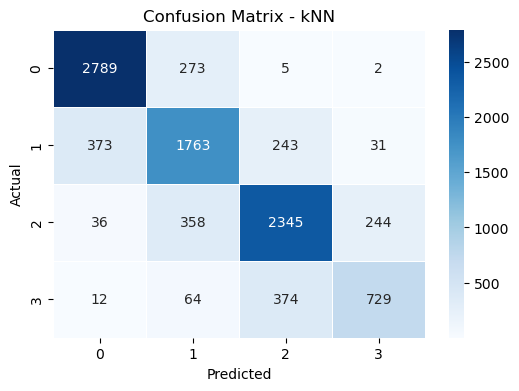

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

print('Accuracy of the kNN is', round(metrics.accuracy_score(Y_test, Y_pred_knn) * 100, 2), 'percent')
print("Classification Report (kNN):")
print(metrics.classification_report(Y_test, Y_pred_knn))

cm_knn = confusion_matrix(Y_test, Y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - kNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest

Accuracy of Random Forest 0.9346540815268126
Classification Report for Random Forest
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97      3069
         2.0       0.93      0.91      0.92      2410
         3.0       0.92      0.93      0.92      2983
         4.0       0.88      0.91      0.90      1179

    accuracy                           0.93      9641
   macro avg       0.93      0.93      0.93      9641
weighted avg       0.93      0.93      0.93      9641



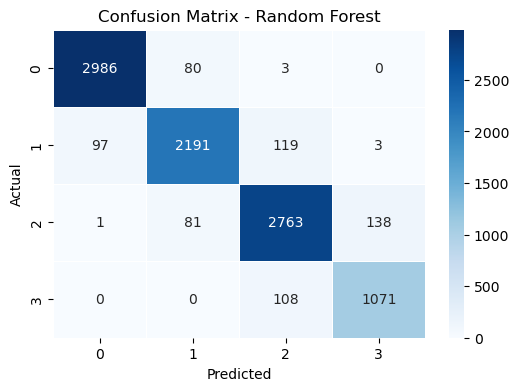

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, Y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(Y_test, rf_pred)
print("Accuracy of Random Forest", rf_accuracy)

rf_classification_rep = classification_report(Y_test, rf_pred)
print("Classification Report for Random Forest")
print(rf_classification_rep)

cm_knn = confusion_matrix(Y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM

Accuracy of SVM Classifier 0.7775127061508142
Classification Report for SVM Classifier
              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93      3069
         2.0       0.77      0.80      0.79      2410
         3.0       0.67      0.86      0.75      2983
         4.0       0.58      0.13      0.21      1179

    accuracy                           0.78      9641
   macro avg       0.74      0.68      0.67      9641
weighted avg       0.77      0.78      0.75      9641



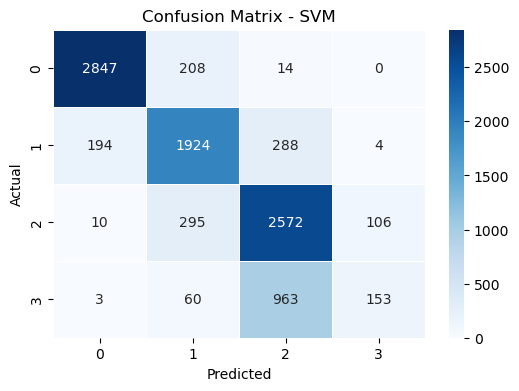

In [26]:
SVM = SVC()
SVM.fit(X_train_scaled, Y_train)
SVM_pred = SVM.predict(X_test_scaled)

SVM_accuracy = accuracy_score(Y_test, SVM_pred)
print("Accuracy of SVM Classifier", SVM_accuracy)

SVM_classification_rep = classification_report(Y_test, SVM_pred)
print("Classification Report for SVM Classifier")
print(SVM_classification_rep)

cm_svn = confusion_matrix(Y_test, SVM_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svn, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes

In [27]:
NB = GaussianNB()
NB.fit(X_train_scaled, Y_train)
NB_pred = NB.predict(X_test_scaled)

NB_accuracy = accuracy_score(Y_test, NB_pred)
print("Accuracy of Naive Bayes Classifier", NB_accuracy)

NB_classification_rep = classification_report(Y_test, NB_pred)
print("Classification Report for Naive Bayes Classifier")
print(NB_classification_rep)

cm_nb = confusion_matrix(Y_test, NB_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svn, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy of Naive Bayes Classifier 0.5867648584171766
Classification Report for Naive Bayes Classifier
              precision    recall  f1-score   support

         1.0       0.85      0.73      0.79      3069
         2.0       0.57      0.45      0.50      2410
         3.0       0.64      0.52      0.57      2983
         4.0       0.29      0.66      0.40      1179

    accuracy                           0.59      9641
   macro avg       0.59      0.59      0.57      9641
weighted avg       0.65      0.59      0.60      9641

